In [2]:
# Calling libraries:
from __future__ import division
%matplotlib inline
import numpy as np,  matplotlib.pyplot as plt
from time import time
from pylab import plot, show, legend
from PF import *
from SV import *
from OU import *
from pseudo_marginal_MH import *
plt.rcParams['figure.figsize'] = (15.0, 3.0)

In [3]:
x_0 = np.asarray([0])
theta_SV = np.asarray([0.9, 0.25, 0.1])
T = 100
y_SV = simulate_data_SV(theta_SV, x_0, T)
data_SV = dict(x_0=x_0, y=y_SV)

In [4]:
def log_prior(theta) :
    sd = 1e0
    return np.sum(-1/(2*sd**2)*theta**2)

In [5]:
n_iter = 1_000
N = T
scale = 5e-2*np.ones(len(theta_SV))

In [6]:
chain, accepted = pm_MH(theta_SV, data_SV, n_iter, propose_RW, acceptance_ratio_RW, 
                        scale, potential_SV, propagate_SV, N, log_prior)

  8%|▊         | 78/1000 [00:01<00:13, 70.59it/s]/home/postdoc/dsen/Desktop/alphaSMC/code/PF.py:37: RuntimeWarning: invalid value encountered in less
  particles = particles[npr.choice(a=N,size=N,replace=True,p=weights/np.sum(weights))]
100%|██████████| 1000/1000 [00:11<00:00, 90.20it/s]


In [7]:
100*accepted

0.3

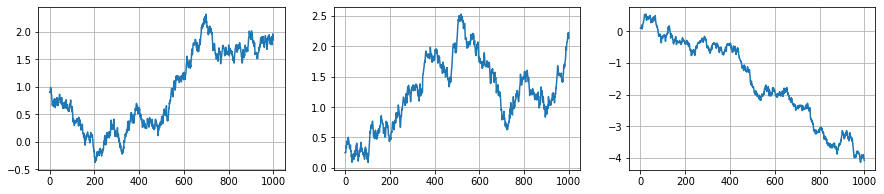

In [8]:
theta_dim = len(theta_SV)
for i in range(theta_dim) :
    plt.subplot(1,theta_dim,i+1)
    plt.plot(chain[:,i])
    plt.grid(True);